In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
%matplotlib inline

In [90]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)
path="/content/drive/MyDrive/Colab Notebooks/Packages Project/" #set path to data files as required

Mounted at /content/drive


In [91]:
# Datasets
inability_to_make_ends_meet = pd.read_csv(path+'inability_to_make_ends_meet_percent.csv')
domestic_violence_by_education = pd.read_csv(path+'domestic_violence_by_education.csv')
material_deprivation = pd.read_csv(path+'severe_material_deprivation_percent.csv')
crime_rates = pd.read_csv(path+'intentional_homicide_rape_sexual_assault_hundred_thousand_inhabitants.csv')


Exercise 1: Exploratory data analysis. Sort the Inability to make ends meet DataFrame based on the 'With Great Difficulty' column in descending order. Display the head and tail of the sorted DataFrame. Calculate and display the summary statistics of the dataset. Interpret the results.


In [101]:
# Sort by 'With Great Difficulty' column in descending order
sorted_df = inability_to_make_ends_meet.sort_values(by='With Great Difficulty', ascending=False)

# Display the sorted DataFrame (head and tail)
print("Head:")
print(sorted_df.head())
print("----------------------------------------------------")
print("Tail:")
print(sorted_df.tail())
print("----------------------------------------------------")

# Summary statistics
print("Summary Statistics:")
print(inability_to_make_ends_meet.describe())
print("----------------------------------------------------")


Head:
            Country  With Great Difficulty  With Difficulty  Some Difficulty  \
12           Greece                   37.7             33.3             19.3   
21       Montenegro                   24.9             34.8             28.4   
23  North Macedonia                   24.5             23.4             34.0   
3          Bulgaria                   23.7             26.4             34.4   
0           Albania                   20.1             37.8             25.6   

    Fairly Easily  Easily  Very Easily  
12            6.6     2.7          0.3  
21            8.2     2.6          1.2  
23           14.5     3.3          0.4  
3            12.0     2.8          0.7  
0             9.3     6.9          0.3  
----------------------------------------------------
Tail:
        Country  With Great Difficulty  With Difficulty  Some Difficulty  \
22  Netherlands                    2.9              7.2             15.3   
8       Estonia                    2.7              8.5 

1. **Head**:
   - These are the countries with the highest levels of difficulty in making ends meet, sorted by the percentage of people who reported having great difficulty.
   - For example, in Greece, 37.7% of respondents reported having great difficulty making ends meet, followed by Montenegro with 24.9%, and so on.
   - The columns 'With Great Difficulty' through 'Very Easily' represent the percentage of respondents in each country who reported their ability to make ends meet falling into different categories, from 'With Great Difficulty' to 'Very Easily'.

2. **Tail**:
   - These are the countries with the lowest levels of difficulty in making ends meet, sorted by the percentage of people who reported having great difficulty.
   - For example, in Netherlands, only 2.9% of respondents reported having great difficulty making ends meet, followed by Estonia with 2.7%, and so on.
   - Similarly, the columns 'With Great Difficulty' through 'Very Easily' represent the percentage of respondents in each country who reported their ability to make ends meet falling into different categories.

3. **Summary Statistics**:
   - These statistics provide an overview of the distribution of responses across all countries.
   - For each category ('With Great Difficulty' through 'Very Easily'), the statistics include count, mean, standard deviation, minimum, 25th percentile (Q1), median (50th percentile or Q2), 75th percentile (Q3), and maximum.
   - For instance, the mean percentage of respondents reporting 'With Great Difficulty' across all countries is approximately 9.19%, with a standard deviation of 8.43%. Similarly, you can interpret the statistics for other categories.

Exercise 2: Data Preprocessing and Cleaning.
Handle missing values in the datasets: `material_deprivation`, `domestic_violence_by_education`, and `crime_rates`.
Replace non-numeric values with NaN in the `crime_rates` dataset, excluding the 'Country' column.
Convert numeric strings to numeric values in the `crime_rates` dataset, excluding the 'Country' column.
Calculate the mean for each column in the `crime_rates` dataset.
Replace missing values in the `crime_rates` dataset with the calculated mean for each respective column.
Print the updated `crime_rates` dataset.
Interpret the steps taken and discuss the implications of handling missing values in the dataset.

In [102]:
# Handle missing values
material_deprivation = material_deprivation.dropna()
domestic_violence_by_education = domestic_violence_by_education.dropna()


#Replace non-numeric values with NaN
numeric_columns = crime_rates.columns.drop('Country')  # Exclude 'Country' column
crime_rates[numeric_columns] = crime_rates[numeric_columns].replace(':', np.nan)

#Convert numeric strings to numeric values (excluding 'Country' column)
crime_rates[numeric_columns] = crime_rates[numeric_columns].apply(pd.to_numeric, errors='coerce')

#Calculate the mean for each column
mean_intentional_homicide = crime_rates['Intentional homicide'].mean()
mean_rape = crime_rates['Rape'].mean()
mean_sexual_assault = crime_rates['Sexual assault'].mean()

#Replace missing values with the mean for each column
crime_rates['Intentional homicide'] = crime_rates['Intentional homicide'].fillna(mean_intentional_homicide)
crime_rates['Rape'] = crime_rates['Rape'].fillna(mean_rape)
crime_rates['Sexual assault'] = crime_rates['Sexual assault'].fillna(mean_sexual_assault)

#Print the updated dataset
print(crime_rates)

            Country  Intentional homicide       Rape  Sexual assault
0           Albania              2.270000   2.660000        2.480000
1           Austria              0.870000  19.870000       29.640000
2          Bulgaria              1.190000   1.870000        7.070000
3           Croatia              0.810000  11.550000        9.300000
4            Cyprus              1.710000  12.532222       19.861923
5           Czechia              0.910000   6.520000        8.450000
6           Denmark              1.140000  34.260000       45.690000
7           Estonia              1.960000  12.532222       19.861923
8           Finland              1.590000  24.700000       43.420000
9            France              1.120000  35.030000       51.480000
10          Germany              0.750000  11.700000       40.680000
11           Greece              0.730000   1.740000       19.861923
12          Hungary              0.650000   3.900000       19.861923
13          Iceland              0

Exercise 3: Exploratory Data Analysis - Distribution of Inability to Make Ends Meet

The dataset contains information about the percentage of respondents in various countries who reported different levels of difficulty in making ends meet. Plot histograms for each difficulty category separately. Each histogram will represent the distribution of a specific difficulty category, such as "With Great Difficulty," "With Difficulty," "Some Difficulty," "Fairly Easily," and "Easily." Interpret the histograms, analyzing the distribution of different difficulty categories across the dataset.

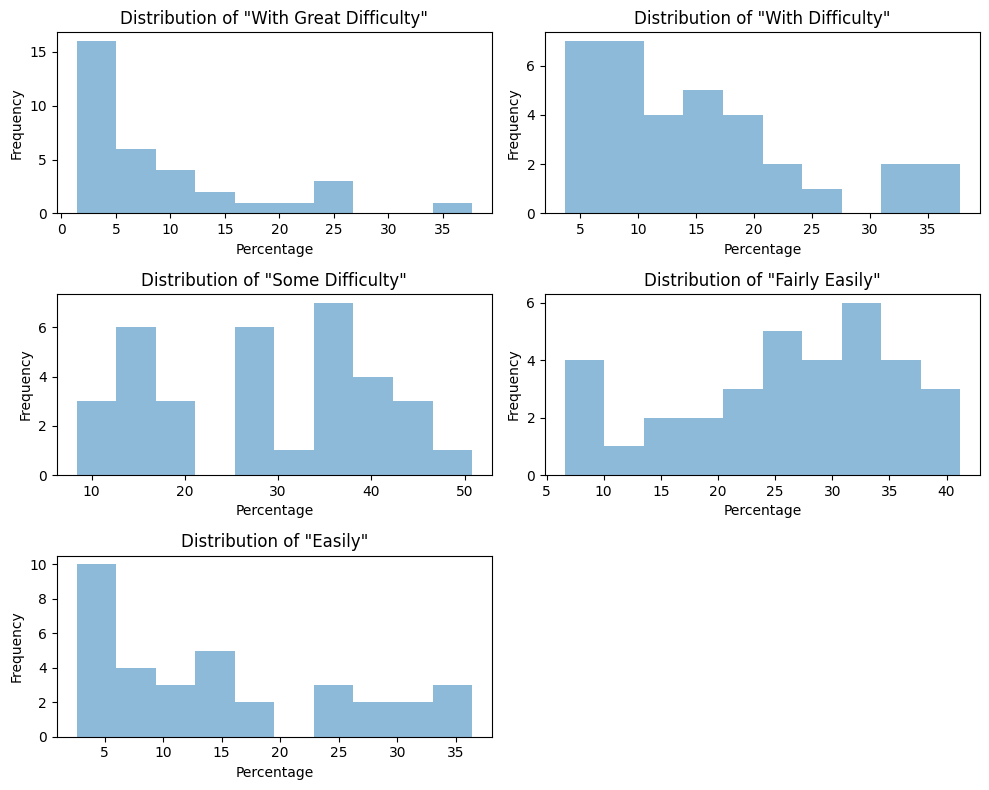

In [103]:
# Plot histograms for each difficulty category separately
plt.figure(figsize=(10, 8))

difficulty_categories = ['With Great Difficulty', 'With Difficulty', 'Some Difficulty', 'Fairly Easily', 'Easily']
for i, category in enumerate(difficulty_categories, start=1):
    plt.subplot(3, 2, i)
    plt.hist(inability_to_make_ends_meet[category], bins=10, alpha=0.5)
    plt.title(f'Distribution of "{category}"')
    plt.xlabel('Percentage')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


Exercise 4: Analyze the distribution of crime rates across different categories in a dataset named crime_rates. Create box plots for each category to visualize the distribution of crime rates. Interpret results



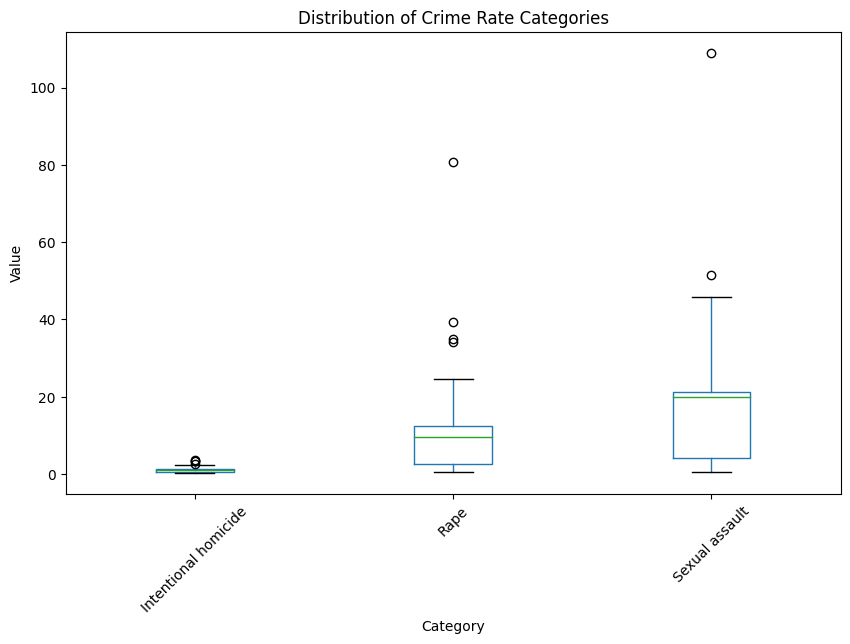

In [104]:
# Create box plots for each category
plt.figure(figsize=(10, 6))  # Set the figure size
crime_rates.iloc[:, 1:].boxplot(grid=False)
plt.title('Distribution of Crime Rate Categories')
plt.xlabel('Category')
plt.ylabel('Value')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


Exercise 5: Data Manipulation and Feature Engineering.
1. Add a new column to the domestic violence by education dataset called 'Total Violence'. Calculate the total violence by summing up the values across all columns (excluding the 'Country' column).
2. Add a new column to the material deprivation dataset called 'Severe Deprivation Rate'. Calculate the severe deprivation rate by dividing the 'Percentage' column by 100.
3. Print the updated domestic violence by education dataset.
4. Print the updated material deprivation dataset.
Ensure that the datasets are printed in a clear and readable format.
Interpret the added columns and their significance in the datasets.

In [105]:
# Convert all columns except the first one to numeric
domestic_violence_by_education.iloc[:, 1:] = domestic_violence_by_education.iloc[:, 1:].apply(pd.to_numeric, errors='coerce')

# Exclude the first column (likely 'Country') before computing the sum
domestic_violence_by_education['Total Violence'] = domestic_violence_by_education.iloc[:, 1:].sum(axis=1, skipna=True)

# Compute the 'Severe Deprivation Rate' by dividing 'Percentage' by 100
material_deprivation['Severe Deprivation Rate'] = material_deprivation['Percentage'] / 100

# Print the updated datasets
print("-------------------------------------------------------------------------------")
print(domestic_violence_by_education)
print("-------------------------------------------------------------------------------")
print(material_deprivation)
print("-------------------------------------------------------------------------------")


-------------------------------------------------------------------------------
        Country < lower secondary  >= upper secondary < tertiary  tertiaty  \
0       Austria              17.5                           21.1      20.0   
1       Belgium              23.6                           19.4      18.1   
2      Bulgaria               9.5                           10.1       8.5   
3       Croatia              10.8                           15.6      16.0   
4       Denmark              28.7                           28.2      26.5   
5       Estonia              33.7                           28.0      22.8   
6       Finland              31.5                           40.6      34.0   
7        France              16.7                           19.4      21.1   
8        Greece              18.3                           22.7      29.3   
9       Kosovo*               8.6                            5.4       5.2   
10       Latvia              22.7                           18

Exercise 6: Inability to Make Ends Meet Distribution Analysis. Plot histograms for each category of inability to make ends meet (excluding 'Country'). Analyze these histograms to provide further insights into the distribution of different levels of difficulty in making ends meet across the dataset.

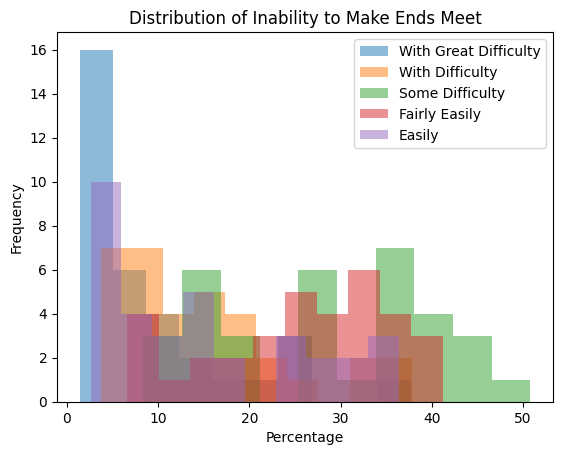

In [106]:
# Plot histograms for all difficulty categories
plt.hist(inability_to_make_ends_meet['With Great Difficulty'], alpha=0.5, label='With Great Difficulty', bins=10)
plt.hist(inability_to_make_ends_meet['With Difficulty'], alpha=0.5, label='With Difficulty', bins=10)
plt.hist(inability_to_make_ends_meet['Some Difficulty'], alpha=0.5, label='Some Difficulty', bins=10)
plt.hist(inability_to_make_ends_meet['Fairly Easily'], alpha=0.5, label='Fairly Easily', bins=10)
plt.hist(inability_to_make_ends_meet['Easily'], alpha=0.5, label='Easily', bins=10)

# Add labels and legend
plt.title('Distribution of Inability to Make Ends Meet')
plt.xlabel('Percentage')
plt.ylabel('Frequency')
plt.legend()

# Show the plot
plt.show()

Exercice 7: Create a function to Calculate Severity of Material Deprivation. Define a function called `deprivation_severity` that categorizes material deprivation severity based on the percentage provided. The severity is classified as "Low" if the percentage is less than 5, "Medium Low" if between 5 and 10, "Medium High" if between 10 and 15, and "High" for percentages above 15. Another function, `calculate_severity_for_all`, applies the severity calculation to all countries in the dataset. It iterates through the DataFrame rows, computes the severity for each country based on the percentage, and returns a dictionary containing severity levels for each country. The severity levels are then sorted from low to high based on a custom sort order, and the results are printed, showing the severity of material deprivation for all countries sorted accordingly.

In [107]:
# Function to calculate severity of material deprivation
def deprivation_severity(percentage):
    if percentage < 5:
        return 'Low'
    elif percentage >= 5 and percentage < 10:
        return 'Medium Low'
    elif percentage >= 10 and percentage < 15:
        return 'Medium High'
    else:
        return 'High'

# Function to calculate severity for all countries
def calculate_severity_for_all(df):
    severity_levels = {}
    for index, row in df.iterrows():
        country = row['Country']
        percentage = row['Percentage']  # Assuming 'Percentage' column contains the deprivation rate
        severity_levels[country] = deprivation_severity(percentage)
    return severity_levels

# Applying the function to your dataset
severity_levels = calculate_severity_for_all(material_deprivation)

# Define custom sort order
custom_sort_order = {'Low': 0, 'Medium Low': 1, 'Medium High': 2, 'High': 3}

# Sorting severity levels from low to high based on custom sort order
sorted_severity_levels = {k: v for k, v in sorted(severity_levels.items(), key=lambda item: custom_sort_order[item[1]])}

# Printing sorted severity levels for all countries
print("Severity of material deprivation for all countries (sorted from low to high):")
for country, severity in sorted_severity_levels.items():
    print(country, ":", severity)


Severity of material deprivation for all countries (sorted from low to high):
Austria : Low
Belgium : Low
Czechia : Low
Denmark : Low
Estonia : Low
Finland : Low
France : Low
Germany : Low
Iceland : Low
Luxembourg : Low
Malta : Low
Netherlands : Low
Norway : Low
Poland : Low
Slovenia : Low
Spain : Low
Sweden : Low
Switzerland : Low
Croatia : Medium Low
Cyprus : Medium Low
Hungary : Medium Low
Ireland : Medium Low
Italy : Medium Low
Latvia : Medium Low
Lithuania : Medium Low
Portugal : Medium Low
Slovakia : Medium Low
Montenegro : Medium High
Romania : Medium High
Serbia : Medium High
Albania : High
Bulgaria : High
Greece : High
North Macedonia : High
Turkiye : High
